In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars =r"C:\Users\Garba Buhari\Desktop\car price prediction\Automobile_data.csv"
data = pd.read_csv(cars)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data = pd.read_csv(cars)

def clean_line(line):
    return line.strip()


with open(cars, 'r') as file, open('cleaned_cars.csv', 'w') as cleaned_file:
    for line in file:
        cleaned_line = clean_line(line) 
        cleaned_file.write(cleaned_line + '\n')  

print("Cleaning complete. Cleaned data saved to:", 'cleaned_cars.csv')

df_cleaned = pd.read_csv('cleaned_cars.csv')

data['engine-location'].fillna(data['engine-location'].mode()[0], inplace=True)

data = pd.read_csv('cleaned_cars.csv')
data.replace('?', np.nan, inplace = True)

numerical_columns = ['normalized-losses', 'width', 'height', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
for col in numerical_columns:
    data[col] = data[col].astype(float)  
    data[col].fillna(data[col].mean(), inplace=True)  


print(data.isnull().sum())
data.dropna(subset =['price'], inplace = True)

Cleaning complete. Cleaned data saved to: cleaned_cars.csv
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [4]:
import pandas as pd

x = data.drop(['price'], axis=1)
y = data['price'].astype(float)

categorical_features = ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
                        'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 
                        'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'fuel-system']

existing_categorical_features = [col for col in categorical_features if col in x.columns]

x_encoded = pd.get_dummies(x, columns=existing_categorical_features, drop_first=True)
categorical_features = ['fuel-system']
x = pd.get_dummies(x, columns=categorical_features, drop_first=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)



In [5]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(x_train, y_train)


HistGradientBoostingRegressor()

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

model = Ridge(alpha=2.0)
model.fit(X_train_imputed, y_train)


Ridge(alpha=2.0)

C:\Users\Garba Buhari\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


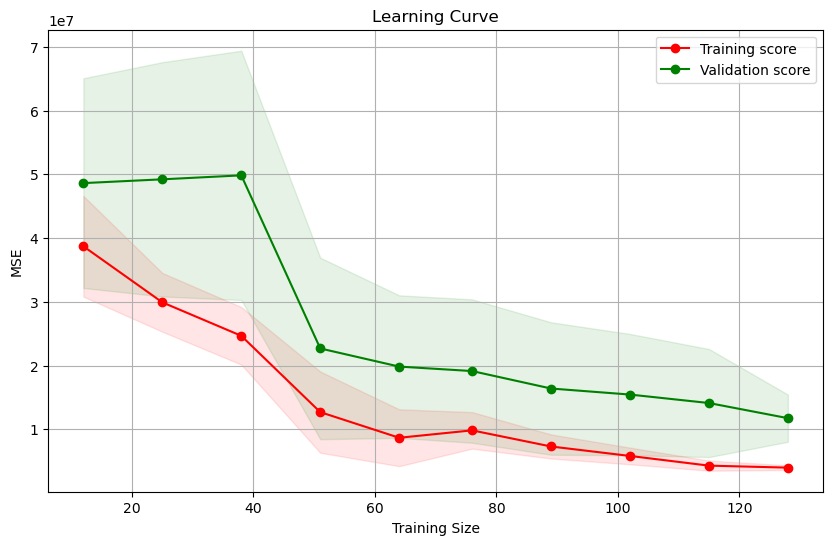

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np


model = HistGradientBoostingRegressor()


train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X_train_imputed, 
                                                        y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='neg_mean_squared_error')


train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color='red')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.grid()
plt.show()


In [8]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


audi = pd.DataFrame({
    'normalized-losses': [np.nan],
    'make': ['audi'],
    'fuel-type': ['gas'],
    'aspiration': ['turbo'],
    'num-of-doors': ['two'],
    'body-style': ['hatchback'],
    'drive-wheels': ['4wd'],
    'engine-location': ['front'],
    'width': [99.5],  
    'fuel-system': ['mpfi'],
    'height': [67.9],             
    'num-of-cylinders': [5],      
    'stroke': [3.13],             
    'horsepower': [131],          
    'peak-rpm': [5500],
    'city-mpg': [16],             
    'highway-mpg': [22],          
    'engine-type': ['mpfi'],      
})


imputer = IterativeImputer()
X_train_imputed = imputer.fit_transform(x_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=x_train.columns)


model = HistGradientBoostingRegressor()
model.fit(X_train_imputed, y_train)

categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-type']
audi_encoded = pd.get_dummies(audi, columns=categorical_features, drop_first=True)

audi_encoded = audi_encoded.reindex(columns=X_train_imputed.columns, fill_value=0)

predicted_price = model.predict(audi_encoded)
print(f'Predicted price for the audi car: {predicted_price[0]}')


Predicted price for the audi car: 11525.33612511414
